In [1]:
from slab import *
from matplotlib import pyplot as plt
from slab import dsfit
from slab import dataanalysis
from slab.datamanagement import SlabFile
from numpy import *
import csv
%matplotlib inline
%config InlineBackend.figure_format='retina'

data_dir = r'S:\_Data\160408 - M007 EonHe with OffChip Cap'
exp_dir = r'S:\_Data\160301 - M016 EonHe\experiment'
nbfig_dir = r'C:\Users\slab\Google Drive\grad school\schuster lab\Analysis\IPython Notebooks\Figures'

sys.path.append(exp_dir)
sys.path.append(r'C:\Users\slab\Google Drive\grad school\schuster lab')
from data_cache import dataCacheProxy
from Analysis.Modules import common, fit, anal

In [102]:
fn1 = r'dip1_20MHz_span.csv'
fn2 = r'overview.csv'
fn3 = r'overview_2.csv'

In [103]:
wid_data = 3

def load_data(datafile, len_data=1990):

    with open(datafile, 'rb') as f:
        reader = csv.reader(f)
        for idx,row in enumerate(reader):
            if idx == 0:
                data = np.zeros([len_data,wid_data])

            try:
                for k in range(wid_data):
                    data[idx,k] = float(row[k])
            except: 
                pass

    return data 

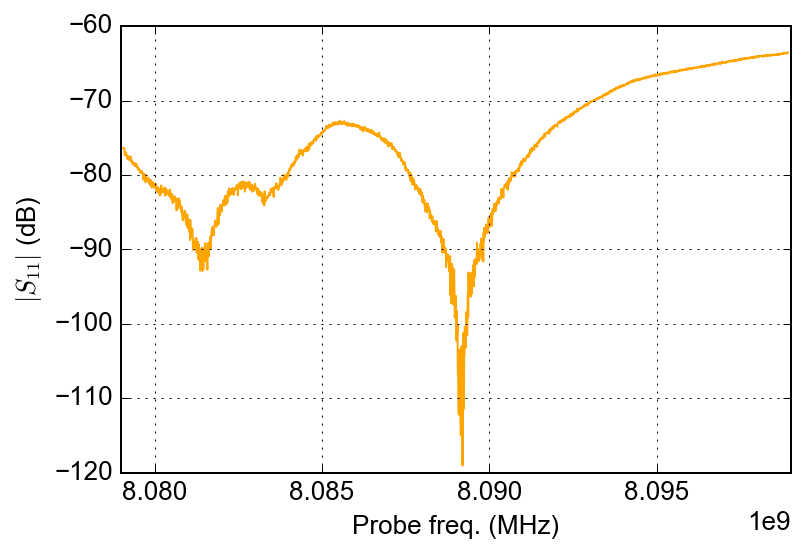

Fit results for S11 func with 1 sigma confidence intervals
---------------------------------------------------------------------
f0 = 8126425796.53 +/- 36305059.767
Qc = 6397.81627785 +/- 2600255.29389
Qi = 586818.442301 +/- 4167829.88417
df = -37207128.3651 +/- 36305691.2755
scale = 8.05796670076e-05 +/- 4.03903974093e-05


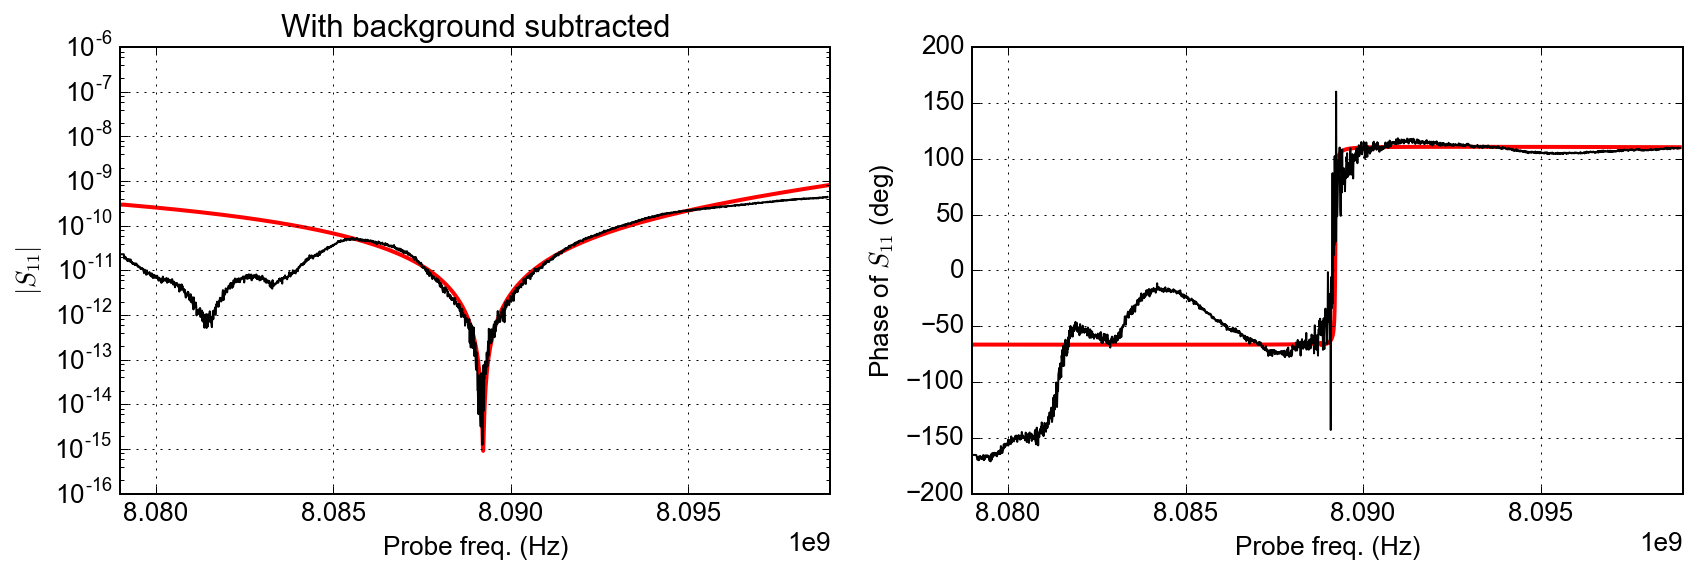

In [105]:
reload(dsfit)
f = load_data(os.path.join(data_dir, fn1))[3:]

fig1 = plt.figure(figsize = (6.,4.))
common.configure_axes(13)
plt.title('')
plt.plot(f[:,0], f[:,1], color = 'orange', label='')

plt.xlim(8.079E9, 8.099E9)
plt.ylim(-120, -60)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('$|S_{11}|$ (dB)')
plt.legend(fancybox = True , shadow=True, loc=0)
plt.grid()
plt.show()

y = dataanalysis.dBm_to_W(f[:,1])
x = f[:,0]

fig2 = plt.figure(figsize = (14.,4.))
common.configure_axes(13)
plt.subplot(121)
plt.title('With background subtracted')

fr, ferr = dsfit.fit_s11(x, sqrt(y), mode='twoport', domain=(8.087E9, 8.092E9))
plt.plot(x, abs(dsfit.s11_mag_twoport(x, *fr))**2, '-r', lw=2.0)
plt.plot(x, y, color = 'black')
plt.yscale('log')
plt.xlim(8.079E9, 8.099E9)
plt.xlabel('Probe freq. (Hz)')
plt.ylabel('$|S_{11}|$')
plt.grid()
plt.ylim(1E-16, 1E-6)

offset = -245
plt.subplot(122)
plt.plot(x, unwrap(dsfit.s11_phase_twoport(x, *fr)*180/pi, discont=180/pi)+offset, '-r', lw=2.0)
plt.plot(x, f[:,2], color = 'black')
plt.xlim(8.079E9, 8.099E9)
plt.xlabel('Probe freq. (Hz)')
plt.ylabel('Phase of $S_{11}$ (deg)')
plt.grid()

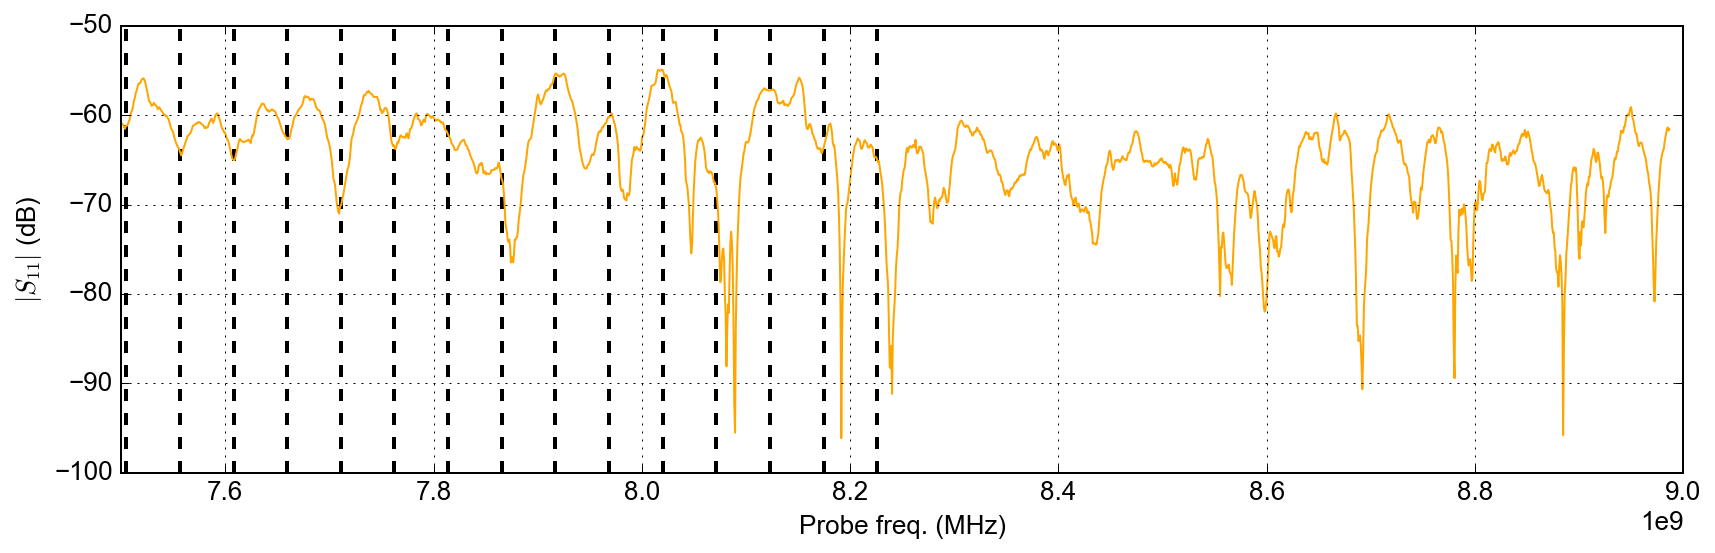

In [79]:
reload(dsfit)
f = load_data(os.path.join(data_dir, fn2))[3:]

fig1 = plt.figure(figsize = (14.,4.))
common.configure_axes(13)
plt.title('')
plt.plot(f[:,0], f[:,1], color = 'orange', label='')

plt.xlim(7.5E9, 9E9)
plt.ylim(-100, -50)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('$|S_{11}|$ (dB)')
plt.legend(fancybox = True , shadow=True, loc=0)
plt.grid()

f0 = 7.505E9
df = 51.5E6
for k in range(15):
    plt.vlines(f0+k*df, -100, -50, colors='k', linestyles='--', lw=2.0)

    
#f0 = 8.05E9
#df = 51E6
#for k in range(8):
#plt.vlines(f0+k*df, -100, -50, colors='b', linestyles='--', lw=2.0)


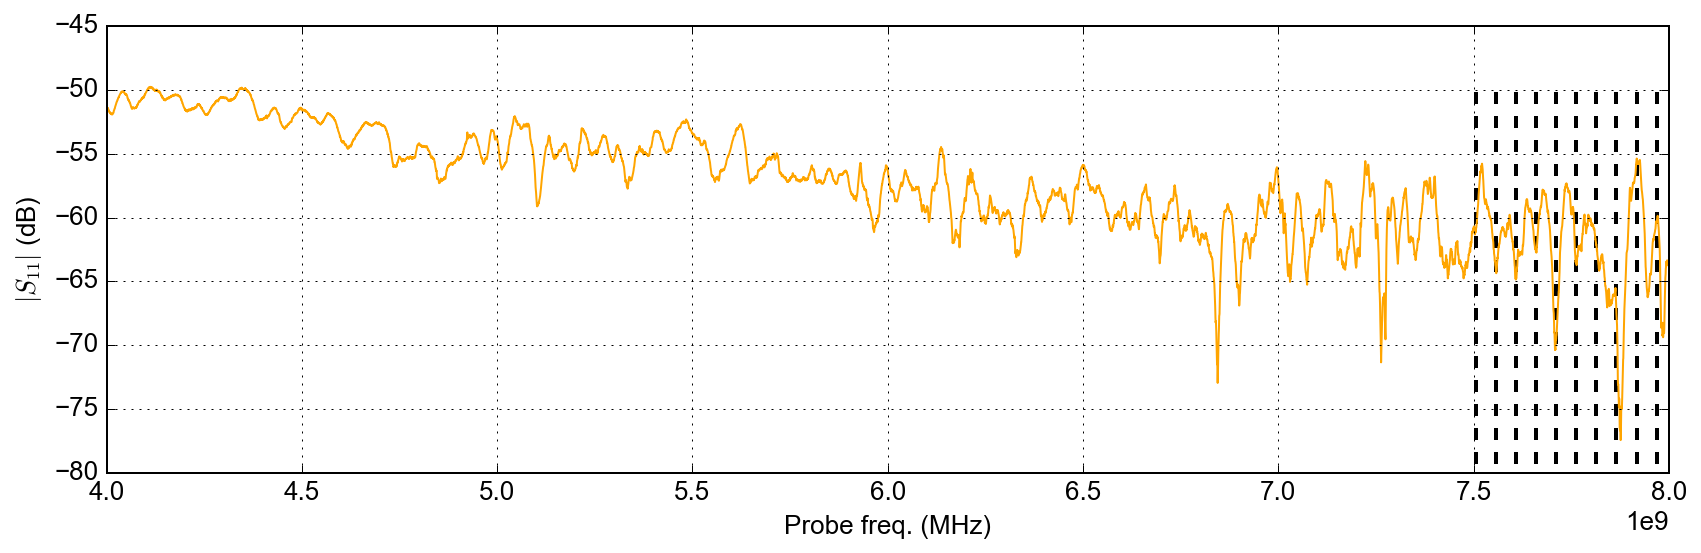

In [10]:
reload(dsfit)
f = load_data(os.path.join(data_dir, fn3), len_data=10000)[3:]

fig1 = plt.figure(figsize = (14.,4.))
common.configure_axes(13)
plt.title('')
plt.plot(f[:,0], f[:,1], color = 'orange', label='')

plt.xlim(4E9, 8E9)
plt.ylim(-80, -45)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('$|S_{11}|$ (dB)')
plt.legend(fancybox = True , shadow=True, loc=0)
plt.grid()

f0 = 7.505E9
df = 51.5E6
for k in range(15):
    plt.vlines(f0+k*df, -100, -50, colors='k', linestyles='--', lw=2.0)

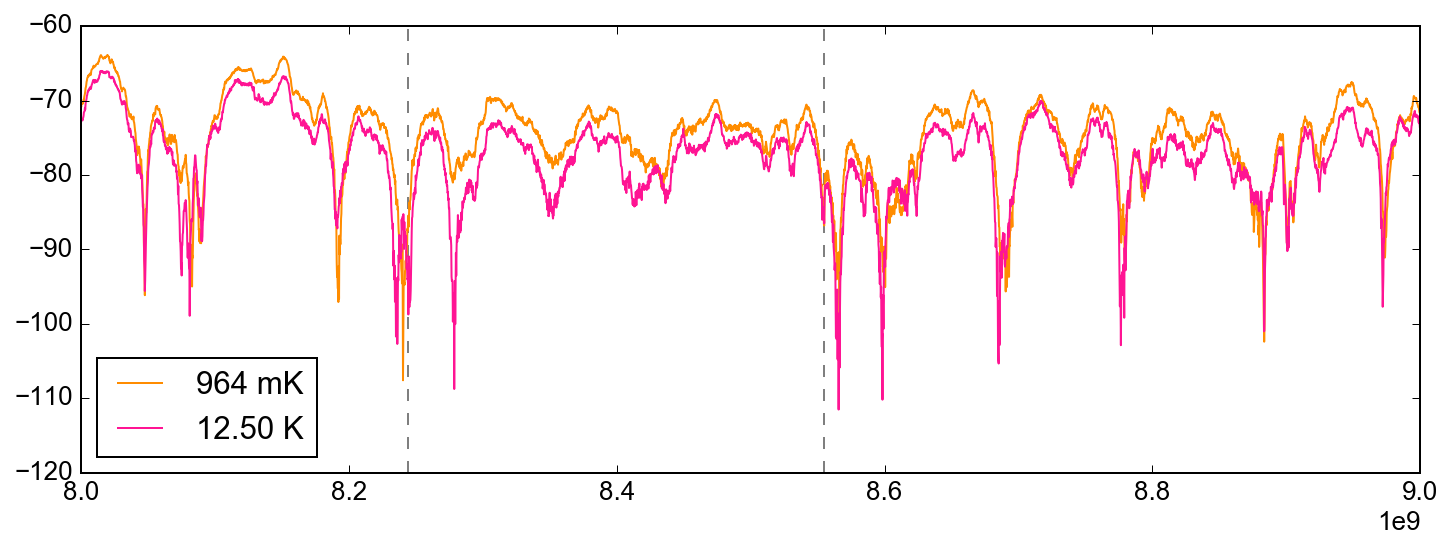

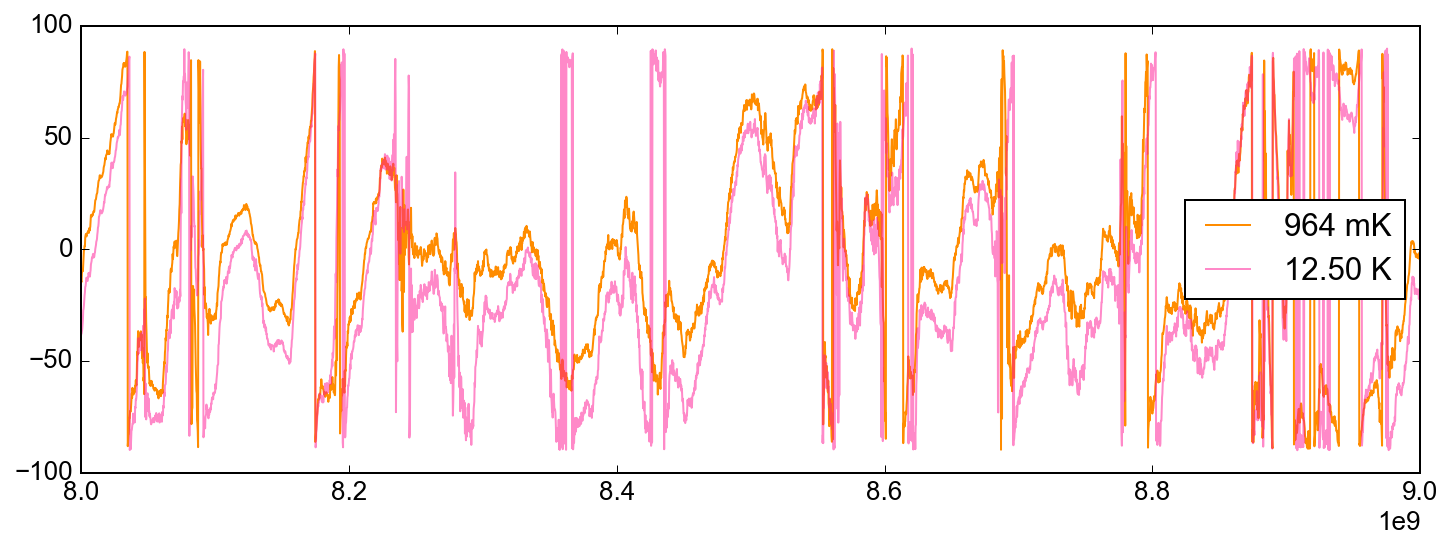

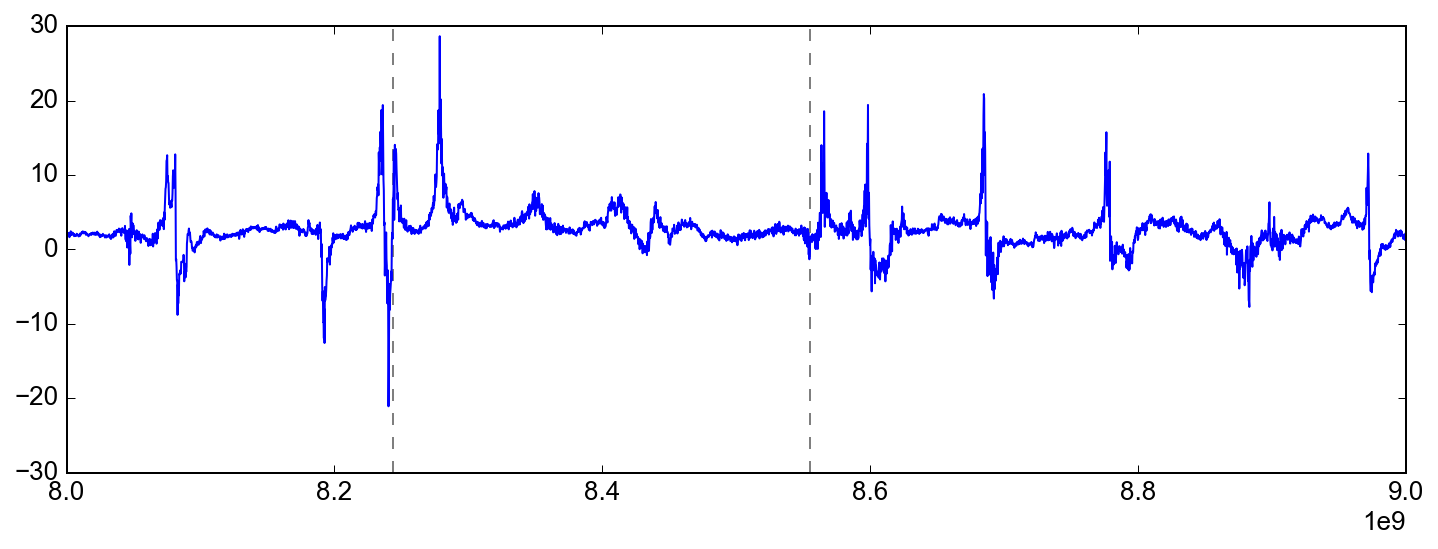

In [80]:
data_folder = r'S:\_Data\160408 - M007 EonHe with OffChip Cap\data\160419'

file_9K = r'141318_nwa_scan\nwa_scan.h5'
#file_20mK = r'124447_nwa_scan\nwa_scan.h5'
file_20mK = r'153607_nwa_scan\nwa_scan.h5'

d_cold = dataCacheProxy(expInst=None, filepath=os.path.join(data_folder, file_20mK))
fpoints = d_cold.get('fpoints')[0]
mag_cold = d_cold.get('mags')[0]
phase_cold = d_cold.get('phases')[0]

d_warm = dataCacheProxy(expInst=None, filepath=os.path.join(data_folder, file_9K))
mag_warm = d_warm.get('mags')[0]
phase_warm = d_warm.get('phases')[0]

xlims=(8.0E9, 9E9)
#xlims=(8.18E9, 8.20E9)
#xlims=(8.20E9, 8.28E9)
#xlims=(8.0E9, 9.0E9)
#xlims=(8.555E9-10E6, 8.555E9+10E6)

plt.figure(figsize=(12.,4.))
common.configure_axes(13)
plt.plot(fpoints, mag_cold, color='darkorange', label='{:.0f} mK'.format(d_cold.get('temperature')[0]*1E3))
plt.plot(fpoints, mag_warm, color='deeppink', label='{:.2f} K'.format(d_warm.get('temperature')[0]))
plt.xlim(xlims)
plt.gca().vlines([8.244E9, 8.555E9], -120, -60, linestyles='--', alpha=0.5)
plt.legend(loc=0)

plt.figure(figsize=(12.,4.))
common.configure_axes(13)
plt.plot(fpoints, phase_cold, color='darkorange', label='{:.0f} mK'.format(d_cold.get('temperature')[0]*1E3))
plt.plot(fpoints, phase_warm, color='deeppink', label='{:.2f} K'.format(d_warm.get('temperature')[0]), alpha=0.5)
plt.xlim(xlims)
plt.legend(loc=0)

plt.figure(figsize=(12.,4.))
common.configure_axes(13)
plt.plot(fpoints, mag_cold-mag_warm)
plt.xlim(xlims)
plt.gca().vlines([8.244E9, 8.555E9], -30, 30, linestyles='--', alpha=0.5)

(8545000000.0, 8565000000.0)

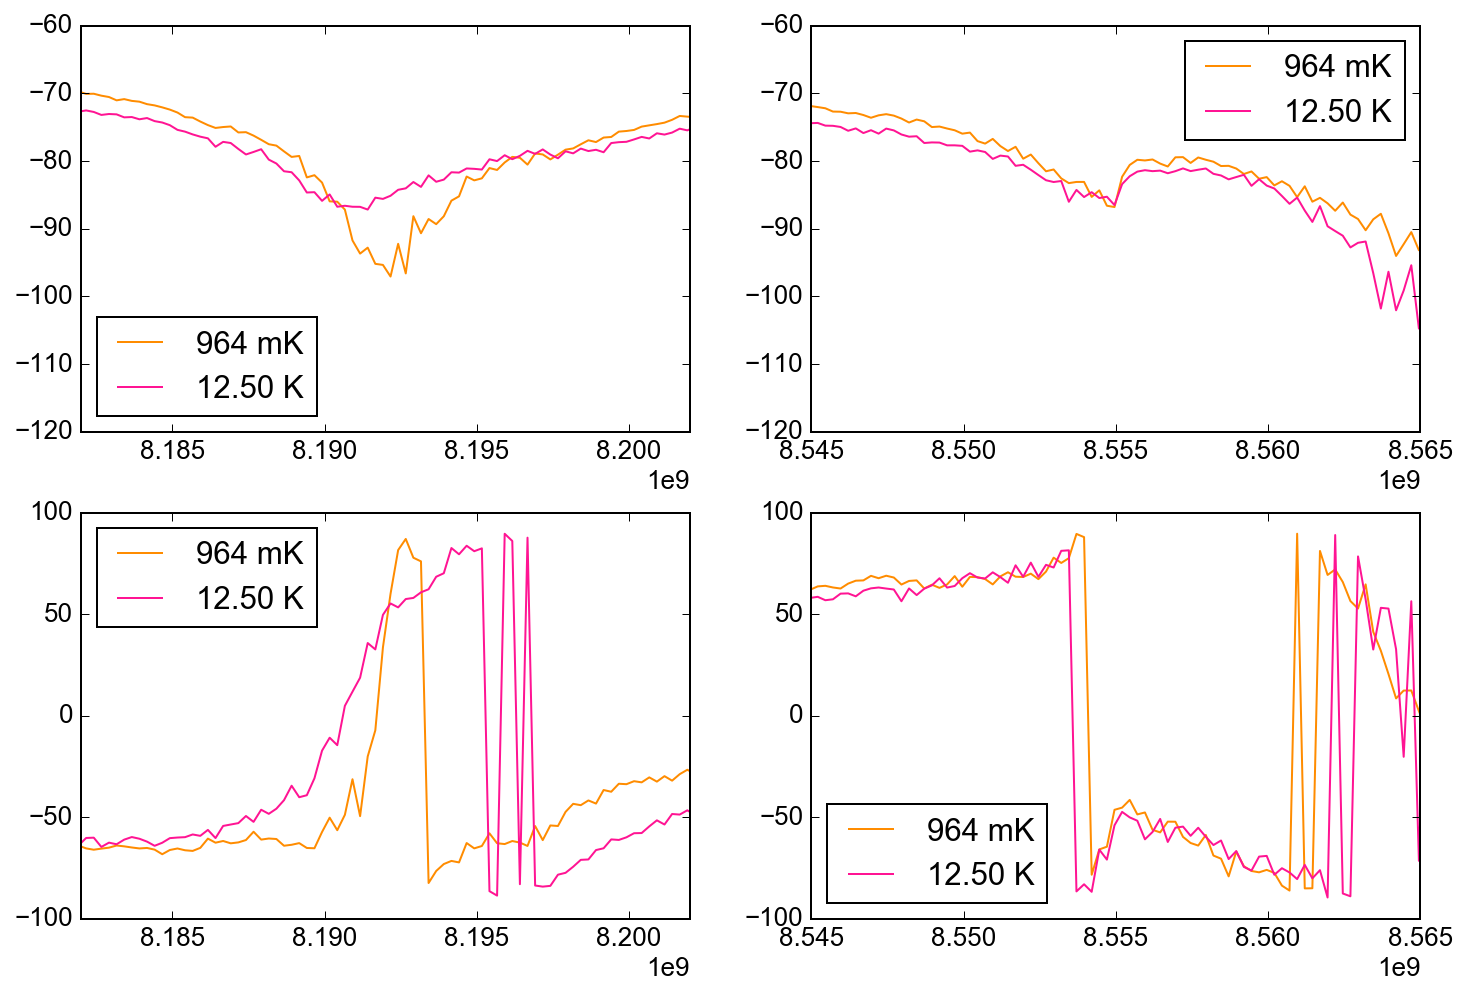

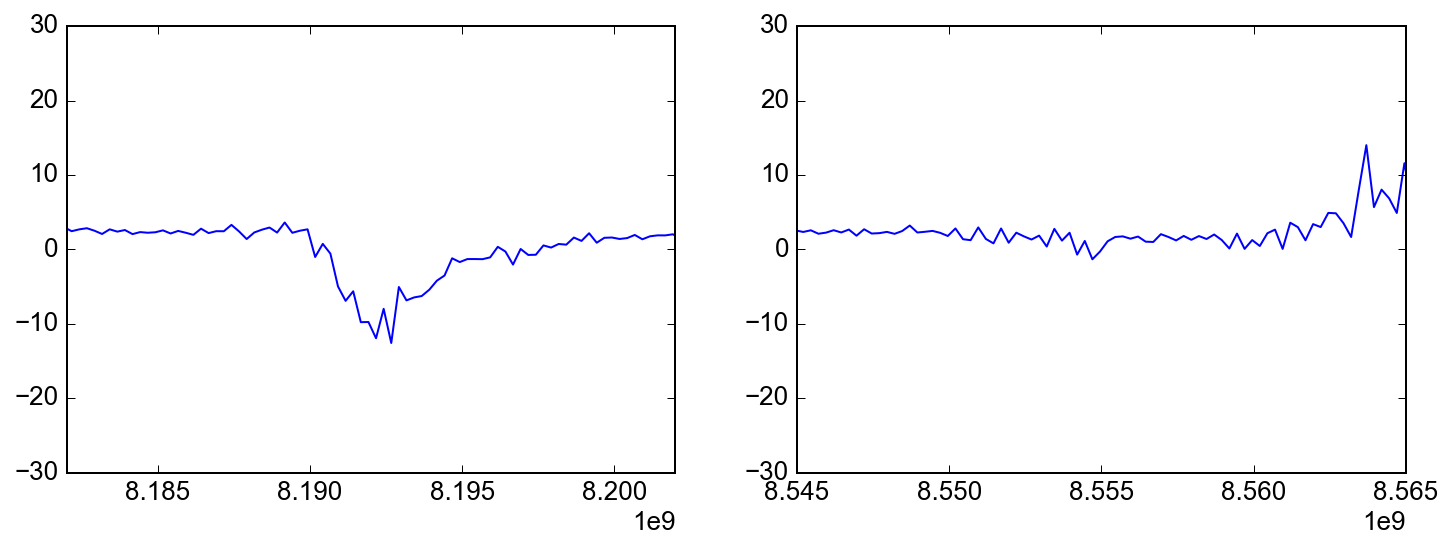

In [81]:
xlims=(6.5E9, 9E9)
#xlims=(8.20E9, 8.28E9)
xlims1=(8.192E9-10E6, 8.192E9+10E6)
xlims2=(8.555E9-10E6, 8.555E9+10E6)

plt.figure(figsize=(12.,8.))
plt.subplot(221)
common.configure_axes(13)
plt.plot(fpoints, mag_cold, color='darkorange', label='{:.0f} mK'.format(d_cold.get('temperature')[0]*1E3))
plt.plot(fpoints, mag_warm, color='deeppink', label='{:.2f} K'.format(d_warm.get('temperature')[0]))
plt.xlim(xlims1)
plt.legend(loc=0)

plt.subplot(223)
common.configure_axes(13)
plt.plot(fpoints, phase_cold, color='darkorange', label='{:.0f} mK'.format(d_cold.get('temperature')[0]*1E3))
plt.plot(fpoints, phase_warm, color='deeppink', label='{:.2f} K'.format(d_warm.get('temperature')[0]))
plt.xlim(xlims1)
plt.legend(loc=0)

plt.subplot(222)
plt.plot(fpoints, mag_cold, color='darkorange', label='{:.0f} mK'.format(d_cold.get('temperature')[0]*1E3))
plt.plot(fpoints, mag_warm, color='deeppink', label='{:.2f} K'.format(d_warm.get('temperature')[0]))
plt.xlim(xlims2)
plt.legend(loc=0)

plt.subplot(224)
plt.plot(fpoints, phase_cold, color='darkorange', label='{:.0f} mK'.format(d_cold.get('temperature')[0]*1E3))
plt.plot(fpoints, phase_warm, color='deeppink', label='{:.2f} K'.format(d_warm.get('temperature')[0]))
plt.xlim(xlims2)
plt.legend(loc=0)

plt.figure(figsize=(12.,4.))
plt.subplot(121)
common.configure_axes(13)
plt.plot(fpoints, mag_cold-mag_warm)
plt.xlim(xlims1)

plt.subplot(122)
plt.plot(fpoints, mag_cold-mag_warm)
plt.xlim(xlims2)

In [108]:
from scipy import interpolate
f = interpolate.interp1d(fpoints, common.moving_average(mag_warm, window_size=5), kind='linear')

(8182000000.0, 8202000000.0)

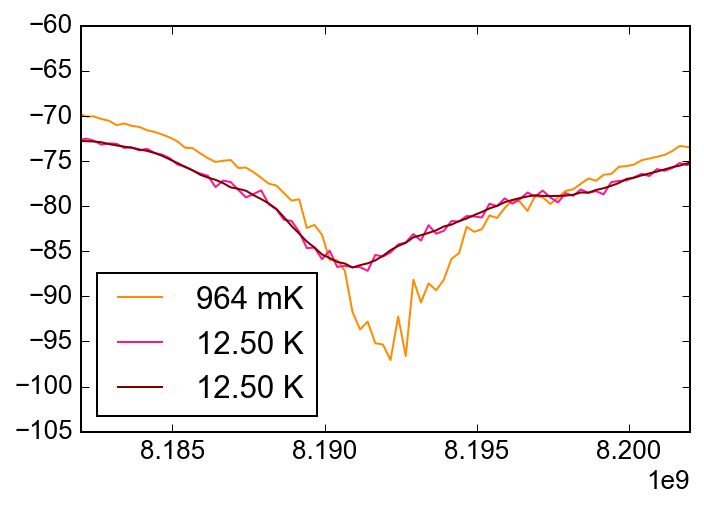

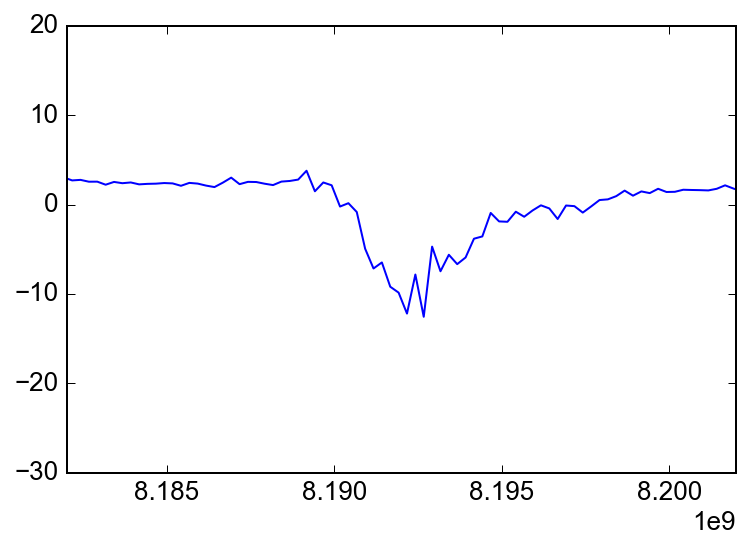

In [109]:
xlims1=(8.192E9-10E6, 8.192E9+10E6)

plt.figure(figsize=(12.,8.))
plt.subplot(221)
common.configure_axes(13)
plt.plot(fpoints, mag_cold, color='darkorange', label='{:.0f} mK'.format(d_cold.get('temperature')[0]*1E3))
plt.plot(fpoints, mag_warm, color='deeppink', label='{:.2f} K'.format(d_warm.get('temperature')[0]))
plt.plot(fpoints, common.moving_average(mag_warm, window_size=5), color='maroon', label='{:.2f} K'.format(d_warm.get('temperature')[0]))
plt.xlim(xlims1)
plt.ylim(-105, -60)
plt.legend(loc=0)

plt.figure(figsize=(6.,4.))
common.configure_axes(13)
plt.plot(fpoints, mag_cold-f(fpoints))
plt.xlim(xlims1)

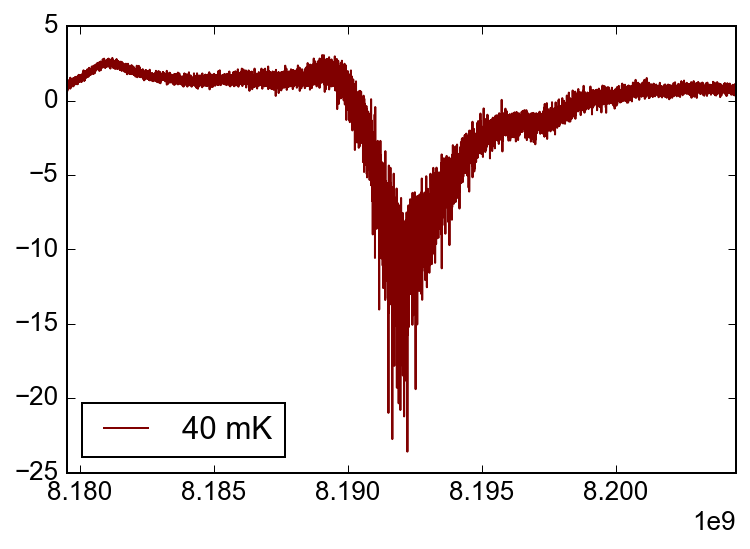

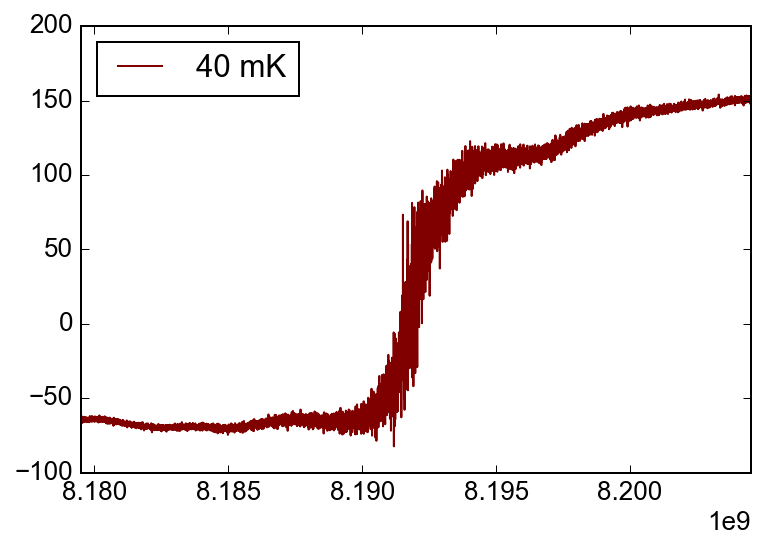

In [112]:
fn = r'171021_nwa_scan\nwa_scan.h5'

d = dataCacheProxy(expInst=None, filepath=os.path.join(data_folder, fn))
fpoints_new = d.get('fpoints')[0]
mag_new = d.get('mags')[0]
phase_new = d.get('phases')[0]

plt.figure(figsize=(6.,4.))
common.configure_axes(13)
plt.plot(fpoints_new, mag_new-f(fpoints_new), color='maroon', label='{:.0f} mK'.format(d.get('temperature')[0]*1E3))
plt.xlim(min(fpoints_new), max(fpoints_new))
plt.legend(loc=0)

plt.figure(figsize=(6.,4.))
common.configure_axes(13)
plt.plot(fpoints_new, phase_new, color='maroon', label='{:.0f} mK'.format(d.get('temperature')[0]*1E3))
plt.xlim(min(fpoints_new), max(fpoints_new))
plt.legend(loc=0)

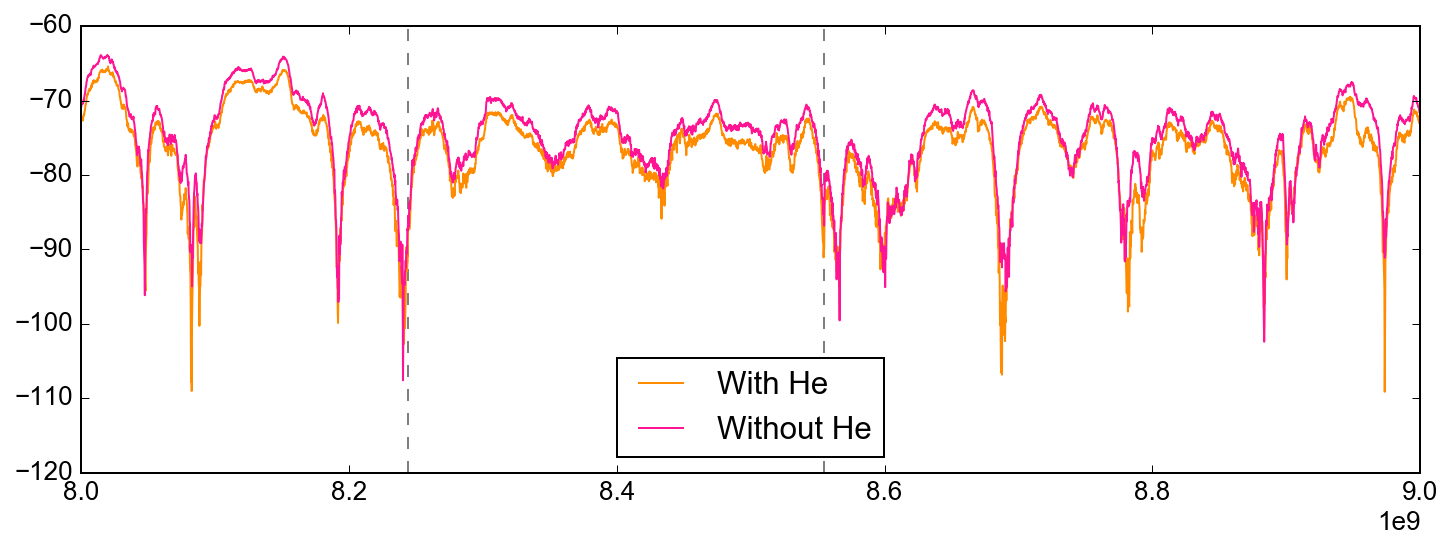

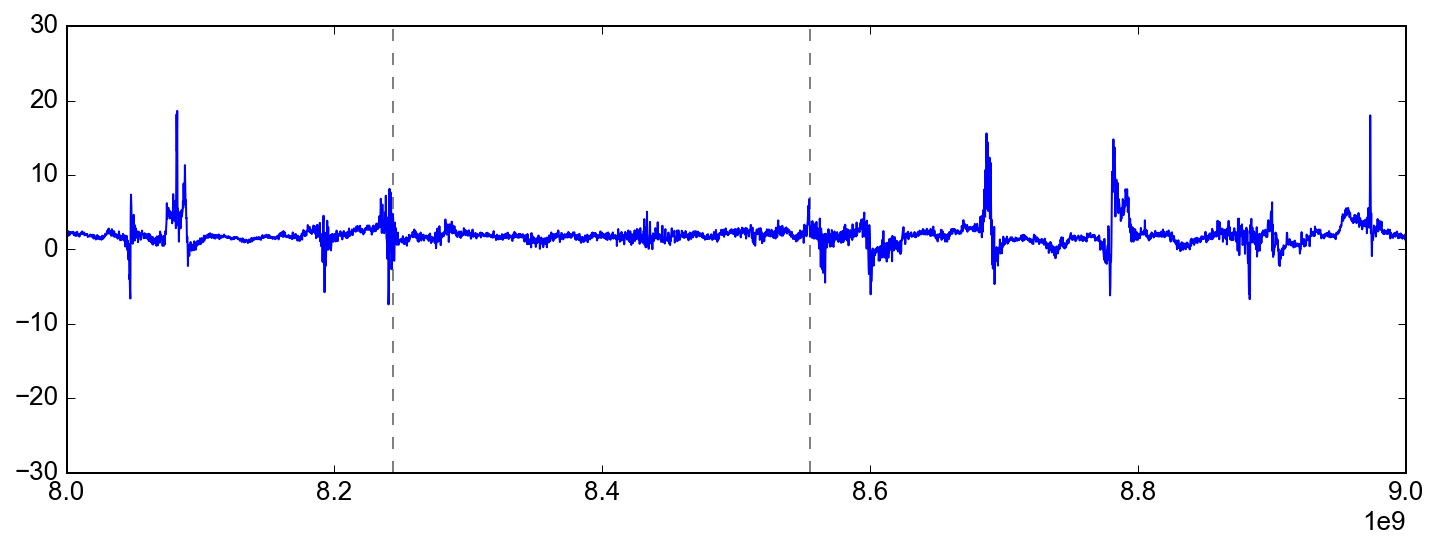

In [122]:
data_folder = r'S:\_Data\160408 - M007 EonHe with OffChip Cap\data'


file_without = r'160419\153607_nwa_scan\nwa_scan.h5'
file_with = r'160420\093518_nwa_scan\nwa_scan.h5'

d_without = dataCacheProxy(expInst=None, filepath=os.path.join(data_folder, file_without))
fpoints = d_without.get('fpoints')[0]
mag_without = d_without.get('mags')[0]
phase_without = d_without.get('phases')[0]

d_with = dataCacheProxy(expInst=None, filepath=os.path.join(data_folder, file_with))
mag_with = d_with.get('mags')[0]
phase_with = d_with.get('phases')[0]

xlims=(8.0E9, 9.0E9)

plt.figure(figsize=(12.,4.))
common.configure_axes(13)
plt.plot(fpoints, mag_with, color='darkorange', label='With He')
plt.plot(fpoints, mag_without, color='deeppink', label='Without He')
plt.xlim(xlims)
plt.gca().vlines([8.244E9, 8.555E9], -120, -60, linestyles='--', alpha=0.5)
plt.legend(loc=0)

plt.figure(figsize=(12.,4.))
common.configure_axes(13)
plt.plot(fpoints, mag_without-mag_with)
plt.xlim(xlims)
plt.gca().vlines([8.244E9, 8.555E9], -30, 30, linestyles='--', alpha=0.5)